In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
conda install -c conda-forge scikit-plot

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install yfinance
!pip install investpy
!pip install pykrx
!pip install seaborn
!pip install workalendar
!pip install --upgrade finance-datareader

You should consider upgrading via the 'C:\Users\user\anaconda3\envs\py38_64\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\user\anaconda3\envs\py38_64\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\user\anaconda3\envs\py38_64\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\user\anaconda3\envs\py38_64\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\user\anaconda3\envs\py38_64\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\user\anaconda3\envs\py38_64\python.exe -m pip install --upgrade pip' command.


In [4]:
!pip install TA_Lib-0.4.19-cp38-cp38-win_amd64.whl

Processing c:\users\user\downloads\ta_lib-0.4.19-cp38-cp38-win_amd64.whl
TA-Lib is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


You should consider upgrading via the 'C:\Users\user\anaconda3\envs\py38_64\python.exe -m pip install --upgrade pip' command.


In [5]:
pip install -U finance-datareader

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\user\anaconda3\envs\py38_64\python.exe -m pip install --upgrade pip' command.


In [6]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import yfinance as yf # yahoo finance API    # pip install yfinance
import investpy # investing.com API          # pip install investpy
from pykrx import stock # krx API           # pip instasll pykrx
import talib as ta # 기술적 분석 (보조지표)
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
import urllib
import time
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
import pandas as pd


#stockCode = '005930' # 065450 빅텍
#trendOfInvestorUrl = 'https://finance.naver.com/item/frgn.nhn?code='+stockCode

code = '005930'
news_url = 'https://finance.naver.com/item/frgn.nhn?code='+code
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'}
response = requests.get(news_url,headers = headers)
response.encoding = 'euc-kr' #한글깨짐방지
soup = BeautifulSoup(response.text, 'html.parser')
#trendOfInvestorHtml = urlopen(trendOfInvestorUrl)
#trendOfInvestorSource = BeautifulSoup(trendOfInvestorHtml.read(), "html.parser")
trendOfInvestorPageNavigation = soup.find_all("table", align="center")
trendOfInvestorMaxPageSection = trendOfInvestorPageNavigation[0].find_all("td", class_="pgRR")
trendOfInvestorMaxPageNum = int(trendOfInvestorMaxPageSection[0].a.get('href')[-3:])

In [8]:
items = []
day = []
institutionPureDealing = []
foreignerPureDealing = []
ownedVolumeByForeigner = []
ownedRateByForeigner = []
#for page in range(1, trendOfInvestorMaxPageNum + 1):
for page in range(1, 40):
    url = 'https://finance.naver.com/item/frgn.nhn?code=' + code + '&page=' + str(page)
    headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'}
    response = requests.get(url,headers = headers)
    response.encoding = 'euc-kr' #한글깨짐방지
    source = BeautifulSoup(response.text, 'html.parser')
    dataSection = source.find("table", summary="외국인 기관 순매매 거래량에 관한표이며 날짜별로 정보를 제공합니다.")
    dayDataList = dataSection.find_all("tr")
    

    
    # day: 날짜
    # institutionPureDealing: 기관순매매
    # foreignerPureDealing: 외인순매매
    # ownedVolumeByForeigner: 외인보유 주식수
    # ownedRateByForeigner : 외인 보유율
    
    for i in range(3,len(dayDataList)):
        if(len(dayDataList[i].find_all("td", class_="tc")) != 0 and len(dayDataList[i].find_all("td", class_="num")) != 0):
            day.append(dayDataList[i].find_all("td", class_="tc")[0].text)
            institutionPureDealing.append(dayDataList[i].find_all("td", class_="num")[4].text)
            foreignerPureDealing.append(dayDataList[i].find_all("td", class_="num")[5].text)
            ownedVolumeByForeigner.append(dayDataList[i].find_all("td", class_="num")[6].text)
            ownedRateByForeigner.append(dayDataList[i].find_all("td", class_="num")[7].text)
    
    

In [9]:
items = [item for item in zip(day, institutionPureDealing,foreignerPureDealing,ownedVolumeByForeigner,ownedRateByForeigner)]
samsung_etc = pd.DataFrame(items, columns=['날짜','INSTITUTE_DEAL','FOREIGNER_DEAL','Volumn_FOREIGNER', '보유율'])
samsung_etc['날짜'] = pd.to_datetime(samsung_etc['날짜'], format='%Y-%m-%d')
samsung_etc = samsung_etc.set_index("날짜")
samsung_etc.sort_values(by=['날짜'], inplace=True, ascending=True)  ## 날짜순 정렬

In [10]:
# 크롤링 start_date, end_date
start_date='2019-01-01'
#input('YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2018-01-01 : ')
end_date='2020-01-01'
#input('YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2020-10-13 : ')

# 크롤링 start_date, end_date
_start_date='2020-01-01'
#input('YYYY-MM-DD 형식을 지켜 입력해주세요 ex) 2018-01-01 : ')
_end_date='2021-02-15'

In [11]:
# 데이터 수집기간 입력
# yahoo finance 양식, ex) yyyy-mm-dd
#start_date = '2018-01-01'
#end_date = '2020-10-13'

# investing.com 양식, ex) dd/mm/yyyy
start_date_ = start_date[8:] + '/' + start_date[5:7] + '/' + start_date[:4]
end_date_ = end_date[8:] + '/' + end_date[5:7] + '/' + end_date[:4]

# krx 양식 ex) yyyymmdd
start_date__ = start_date[0:4] + start_date[5:7] + start_date[8:10]
end_date__ = end_date[0:4] + end_date[5:7] + end_date[8:10]


__start_date = _start_date[8:] + '/' + _start_date[5:7] + '/' + _start_date[:4]
__end_date = _end_date[8:] + '/' + _end_date[5:7] + '/' + _end_date[:4]

# krx 양식 ex) yyyymmdd
___start_date = _start_date[0:4] + _start_date[5:7] + _start_date[8:10]
___end_date = _end_date[0:4] + _end_date[5:7] + _end_date[8:10]


In [12]:
# 코로나 이전날짜
# 주요 3개국 대비 원 환율
# 달러/원
exchange_rate_usd_ = investpy.get_currency_cross_historical_data(currency_cross='USD/KRW', from_date=start_date_, to_date=end_date_)
exchange_rate_usd_.columns = ['exchange_rate_usd_Open', 'exchange_rate_usd_High', 'exchange_rate_usd_Low', 'exchange_rate_usd_Close', 'exchange_rate_usd_Currency']
exchange_rate_usd_ = exchange_rate_usd_.drop(['exchange_rate_usd_Open','exchange_rate_usd_High','exchange_rate_usd_Low','exchange_rate_usd_Currency'], axis=1)

# 삼성 차트 데이터
sam_ = stock.get_market_ohlcv_by_date(start_date__, end_date__, "005930")
sam_.columns = ['Open','High','Low','Close','Volume']
model_samsung = sam_.copy()

# 3) MACD 이동평균수렴확산 (단기(EMA12)와 장기(EMA26) EMA로 모멘텀을 추정)
#macd, macdsignal9, macdhist = ta.MACD(model_samsung.Close, fastperiod=12, slowperiod=26, signalperiod=9)
#model_samsung['macd'] = macd

# 미국 국채 수익률 (5년)
treasury_5y_ = yf.download("^FVX", start=start_date, end=end_date)
treasury_5y_.columns = ['treasury_5y_Open','treasury_5y_High','treasury_5y_Low','treasury_5y_Close','treasury_5y_Adj Close','treasury_5y_Volume']
treasury_5y_ = treasury_5y_.drop(['treasury_5y_Open','treasury_5y_High','treasury_5y_Low','treasury_5y_Adj Close','treasury_5y_Volume'], axis=1)

# HANG SENG
hang_seng_ = yf.download("^HSI", start=start_date, end=end_date)
hang_seng_.columns = ['hang_seng_Open','hang_seng_High','hang_seng_Low','hang_seng_Close','hang_seng_Adj Close','hang_seng_Volume']
hang_seng_ = hang_seng_.drop(['hang_seng_Open','hang_seng_High','hang_seng_Low','hang_seng_Adj Close','hang_seng_Volume'], axis=1)

# Russell 2000
russell_2000_ = yf.download("^RUT", start=start_date, end=end_date)
russell_2000_.columns = ['russell_2000_Open','russell_2000_High','russell_2000_Low','russell_2000_Close','russell_2000_Adj Close','russell_2000_Volume']
russell_2000_ = russell_2000_.drop(['russell_2000_Open','russell_2000_High','russell_2000_Low','russell_2000_Adj Close','russell_2000_Volume'], axis=1)

# SOX 지수 엔비디아(8.9%), 텍사스인스트루먼트(8.6%), 퀄컴(7.7%), 인텔(7.4%) 반도체장비기업 18.52%
SOXX = yf.download("SOXX", start=start_date, end=end_date)
SOXX.columns = ['SOXX_Open','SOXX_High','SOXX_Low','SOXX_Close','SOXX_Adj Close','SOXX_Volume']
SOXX = SOXX.drop(['SOXX_Open','SOXX_High','SOXX_Low','SOXX_Adj Close','SOXX_Volume'], axis=1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [13]:
# 코로나 이후날짜
# 주요 3개국 대비 원 환율
# 달러/원
exchange_rate_usd__ = investpy.get_currency_cross_historical_data(currency_cross='USD/KRW', from_date=__start_date, to_date=__end_date)
exchange_rate_usd__.columns = ['exchange_rate_usd_Open', 'exchange_rate_usd_High', 'exchange_rate_usd_Low', 'exchange_rate_usd_Close', 'exchange_rate_usd_Currency']
exchange_rate_usd__= exchange_rate_usd__.drop(['exchange_rate_usd_Open','exchange_rate_usd_High','exchange_rate_usd_Low','exchange_rate_usd_Currency'], axis=1)

# 삼성 차트 데이터
sam__ = stock.get_market_ohlcv_by_date(___start_date, ___end_date, "005930")
sam__.columns = ['Open','High','Low','Close','Volume']
model_samsung_ = sam__.copy()

# 3) MACD 이동평균수렴확산 (단기(EMA12)와 장기(EMA26) EMA로 모멘텀을 추정)
#macd_, macdsignal9_, macdhist_ = ta.MACD(model_samsung_.Close, fastperiod=12, slowperiod=26, signalperiod=9)
#model_samsung_['macd'] = macd_

# 미국 국채 수익률 (5년)
treasury_5y__ = yf.download("^FVX", start=_start_date, end=_end_date)
treasury_5y__.columns = ['treasury_5y_Open','treasury_5y_High','treasury_5y_Low','treasury_5y_Close','treasury_5y_Adj Close','treasury_5y_Volume']
treasury_5y__ = treasury_5y__.drop(['treasury_5y_Open','treasury_5y_High','treasury_5y_Low','treasury_5y_Adj Close','treasury_5y_Volume'], axis=1)

# HANG SENG
hang_seng__ = yf.download("^HSI", start=_start_date, end=_end_date)
hang_seng__.columns = ['hang_seng_Open','hang_seng_High','hang_seng_Low','hang_seng_Close','hang_seng_Adj Close','hang_seng_Volume']
hang_seng__ = hang_seng__.drop(['hang_seng_Open','hang_seng_High','hang_seng_Low','hang_seng_Adj Close','hang_seng_Volume'], axis=1)

# Russell 2000
russell_2000__ = yf.download("^RUT", start=_start_date, end=_end_date)
russell_2000__.columns = ['russell_2000_Open','russell_2000_High','russell_2000_Low','russell_2000_Close','russell_2000_Adj Close','russell_2000_Volume']
russell_2000__ = russell_2000__.drop(['russell_2000_Open','russell_2000_High','russell_2000_Low','russell_2000_Adj Close','russell_2000_Volume'], axis=1)

# SOX 지수 엔비디아(8.9%), 텍사스인스트루먼트(8.6%), 퀄컴(7.7%), 인텔(7.4%) 반도체장비기업 18.52%
SOXX_ = yf.download("SOXX", start=_start_date, end=_end_date)
SOXX_.columns = ['SOXX_Open','SOXX_High','SOXX_Low','SOXX_Close','SOXX_Adj Close','SOXX_Volume']
SOXX_ = SOXX_.drop(['SOXX_Open','SOXX_High','SOXX_Low','SOXX_Adj Close','SOXX_Volume'], axis=1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [14]:
#model_samsung['US'] = exchange_rate_usd_
#model_samsung['SOXX'] = SOXX
#model_samsung['TREASURY_5Y']=treasury_5y_
#model_samsung['hang_seng'] = hang_seng_
#model_samsung['RUSSELL2000'] = russell_2000_

In [15]:
#model_samsung_['US'] = exchange_rate_usd__
#model_samsung_['SOXX'] = SOXX_
#model_samsung_['TREASURY_5Y']=treasury_5y__
#model_samsung_['hang_seng'] = hang_seng__
#model_samsung_['RUSSELL2000'] = russell_2000__

In [16]:
model_samsung = model_samsung.drop(['Open','High','Low'],axis=1)
model_samsung_ = model_samsung_.drop(['Open','High','Low'],axis=1)


In [17]:
samsung_etc = samsung_etc.drop(['보유율'],axis=1)

In [18]:
samsung_etc

,INSTITUTE_DEAL,FOREIGNER_DEAL,Volumn_FOREIGNER
날짜,,,
2017-12-11,"+27,791","-44,639","68,440,732"
2017-12-12,"-9,084","+17,677","68,451,410"
2017-12-13,"+48,101","-80,565","68,359,636"
2017-12-14,"-52,981","+45,923","68,412,650"
2017-12-15,"+24,083","-53,986","68,355,779"
...,...,...,...
2021-02-05,"+902,128","+393,388","3,279,401,217"
2021-02-08,"+1,046,695","-263,370","3,278,086,074"
2021-02-09,"-557,102","-1,867,221","3,275,509,980"


In [19]:
model_samsung

,Close,Volume
날짜,,
2019-01-02,38750,7847664
2019-01-03,37600,12471493
2019-01-04,37450,14108958
2019-01-07,38750,12748997
2019-01-08,38100,12756554
...,...,...
2019-12-23,55500,9839252
2019-12-24,55000,11868463
2019-12-26,55400,9645034


In [20]:
samsung_etc

,INSTITUTE_DEAL,FOREIGNER_DEAL,Volumn_FOREIGNER
날짜,,,
2017-12-11,"+27,791","-44,639","68,440,732"
2017-12-12,"-9,084","+17,677","68,451,410"
2017-12-13,"+48,101","-80,565","68,359,636"
2017-12-14,"-52,981","+45,923","68,412,650"
2017-12-15,"+24,083","-53,986","68,355,779"
...,...,...,...
2021-02-05,"+902,128","+393,388","3,279,401,217"
2021-02-08,"+1,046,695","-263,370","3,278,086,074"
2021-02-09,"-557,102","-1,867,221","3,275,509,980"


In [21]:
#amsung_etc = samsung_etc.astype(np.float)
#samsung_etc['기관순매매']= samsung_etc['기관순매매'].apply(pd.to_numeric)
#samsung_etc['외인보유 주식수'] = pd.to_numeric(samsung_etc['외인보유 주식수'])
samsung_etc['Volumn_FOREIGNER'] = samsung_etc['Volumn_FOREIGNER'].str.replace(',', '').apply(pd.to_numeric)
samsung_etc['INSTITUTE_DEAL'] = samsung_etc['INSTITUTE_DEAL'].str.replace(',', '').apply(pd.to_numeric)
samsung_etc['FOREIGNER_DEAL'] = samsung_etc['FOREIGNER_DEAL'].str.replace(',', '').apply(pd.to_numeric)

In [22]:
samsung_etc.dtypes

INSTITUTE_DEAL      int64
FOREIGNER_DEAL      int64
Volumn_FOREIGNER    int64
dtype: object

In [23]:
model_samsung = pd.concat([model_samsung,samsung_etc],axis=1)
model_samsung_ = pd.concat([model_samsung_,samsung_etc],axis=1)

In [24]:
model_samsung = model_samsung.dropna() # 결측치가 있는 행 제거
model_samsung_ = model_samsung_.dropna() # 결측치가 있는 행 제거

In [25]:
model_samsung

,Close,Volume,INSTITUTE_DEAL,FOREIGNER_DEAL,Volumn_FOREIGNER
날짜,,,,,
2019-01-02,38750.0,7847664.0,-545197,1281949,3319573281
2019-01-03,37600.0,12471493.0,-1851235,253560,3321405841
2019-01-04,37450.0,14108958.0,895904,-1516919,3322734902
2019-01-07,38750.0,12748997.0,-270253,1724464,3324331866
2019-01-08,38100.0,12756554.0,1334263,-1254491,3323035975
...,...,...,...,...,...
2019-12-23,55500.0,9839252.0,1045950,-240500,3406884621
2019-12-24,55000.0,11868463.0,1390595,-1018528,3403530401
2019-12-26,55400.0,9645034.0,2955575,-1067769,3396470310


In [26]:
# 차트 비교분석을 위한 정규화
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(model_samsung)
output = min_max_scaler.transform(model_samsung)
output = pd.DataFrame(output, columns=model_samsung.columns, index=list(model_samsung.index.values))
print(output.head())

               Close    Volume  INSTITUTE_DEAL  FOREIGNER_DEAL  \
2019-01-02  0.067532  0.138911        0.334444        0.537750   
2019-01-03  0.007792  0.325565        0.218802        0.474792   
2019-01-04  0.000000  0.391666        0.462045        0.366403   
2019-01-07  0.067532  0.336768        0.358789        0.564841   
2019-01-08  0.033766  0.337073        0.500860        0.382469   

            Volumn_FOREIGNER  
2019-01-02          0.000000  
2019-01-03          0.012777  
2019-01-04          0.022044  
2019-01-07          0.033179  
2019-01-08          0.024143  


In [27]:
# 차트 비교분석을 위한 정규화
from sklearn.preprocessing import MinMaxScaler
min_max_scaler_ = MinMaxScaler()
fitted_ = min_max_scaler_.fit(model_samsung_)
output_ = min_max_scaler_.transform(model_samsung_)
output_ = pd.DataFrame(output_, columns=model_samsung_.columns, index=list(model_samsung_.index.values))
print(output_.head())

               Close    Volume  INSTITUTE_DEAL  FOREIGNER_DEAL  \
2020-01-02  0.261856  0.052138        0.485273        0.423816   
2020-01-03  0.268041  0.081918        0.490734        0.482082   
2020-01-06  0.268041  0.018860        0.535164        0.470232   
2020-01-07  0.274227  0.015560        0.589219        0.441188   
2020-01-08  0.294845  0.180966        0.590149        0.592715   

            Volumn_FOREIGNER  
2020-01-02          0.823592  
2020-01-03          0.834871  
2020-01-06          0.847538  
2020-01-07          0.852045  
2020-01-08          0.888763  


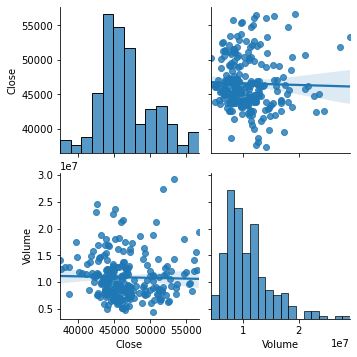

In [28]:
import seaborn as sns
#sns.pairplot(returns[1:]) ## pairplot은 그리도(grid) 형태로 각 집합의 조합에 대해 히스토그램과 분포도 첫번째 행은 null 값이므로 제외하고 수행
sns.pairplot(model_samsung[['Close', 'Volume']], kind='reg')

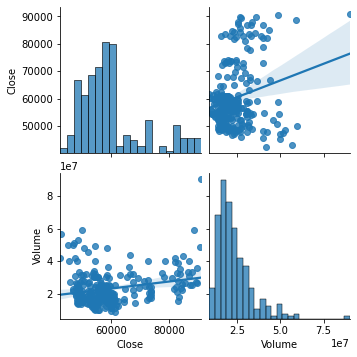

In [29]:
import seaborn as sns
#sns.pairplot(returns[1:]) ## pairplot은 그리도(grid) 형태로 각 집합의 조합에 대해 히스토그램과 분포도 첫번째 행은 null 값이므로 제외하고 수행
sns.pairplot(model_samsung_[['Close', 'Volume']], kind='reg')

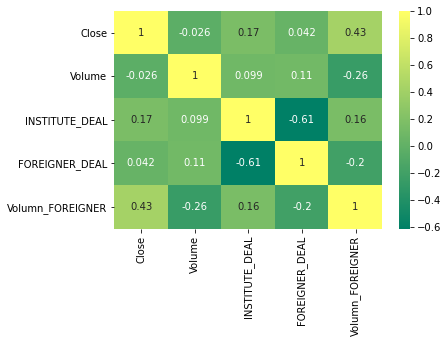

In [30]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(model_samsung.corr(), annot=True, cmap='summer')

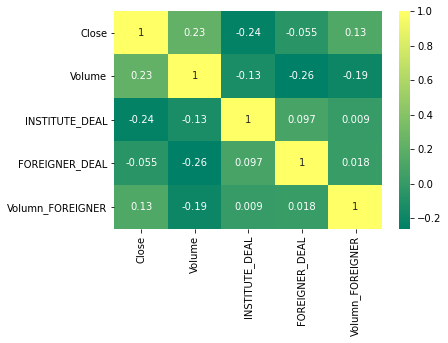

In [31]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(model_samsung_.corr(), annot=True, cmap='summer')

In [32]:
## 코로나 이후 상관관계가 높은 지수(macd,soxx,russell2000 )는 더 높은 상관관계를 보이는 것을 확인 할 수 있다.
## 그러나 환율의 경우 코로나 이후 음의 상관관계가 더 높아 지는 것을 볼 수가 있으며,
## 항생지수의 경우 코로나 전에는 큰 상관관계를 보이지 않다가 코로나 이후 높은 상관관계를 보이는 것을 확인 할 수 있다.

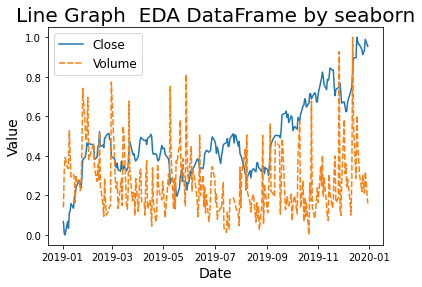

In [33]:
# Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Line graph by seaborn
ax = sns.lineplot(data=output[['Close', 'Volume']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

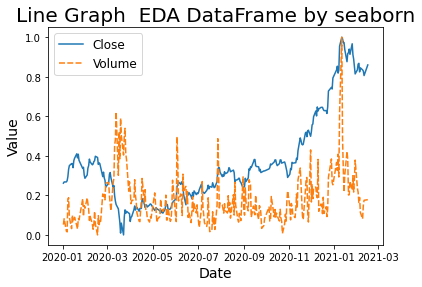

In [34]:
# Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Line graph by seaborn
ax = sns.lineplot(data=output_[['Close', 'Volume']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

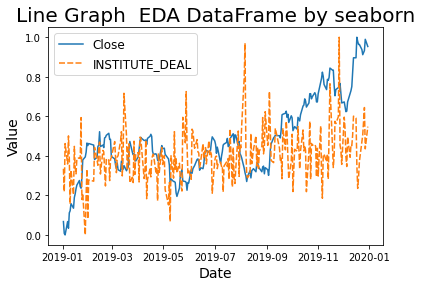

In [35]:
# Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Line graph by seaborn
ax = sns.lineplot(data=output[['Close', 'INSTITUTE_DEAL']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

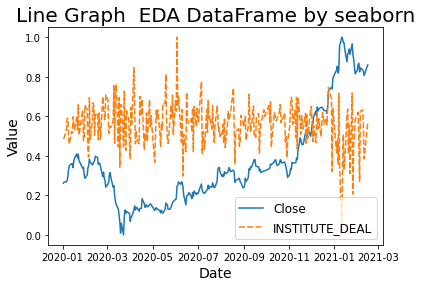

In [36]:
# Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Line graph by seaborn
ax = sns.lineplot(data=output_[['Close', 'INSTITUTE_DEAL']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

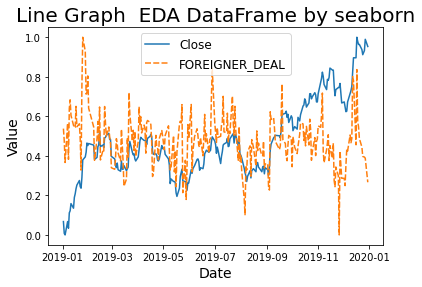

In [37]:
# Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Line graph by seaborn
ax = sns.lineplot(data=output[['Close', 'FOREIGNER_DEAL']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

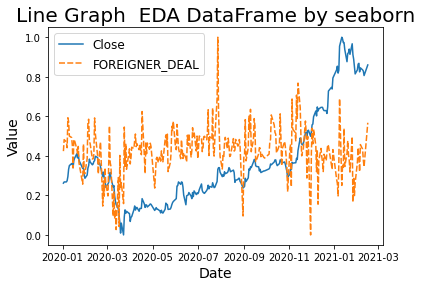

In [38]:
# Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Line graph by seaborn
ax = sns.lineplot(data=output_[['Close', 'FOREIGNER_DEAL']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

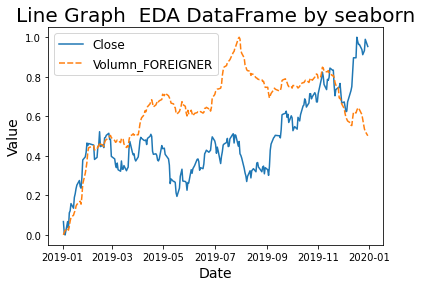

In [39]:
# Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Line graph by seaborn
ax = sns.lineplot(data=output[['Close', 'Volumn_FOREIGNER']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()

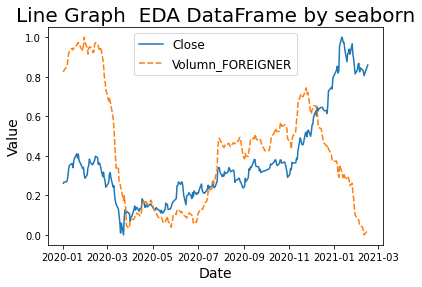

In [40]:
# Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Line graph by seaborn
ax = sns.lineplot(data=output_[['Close', 'Volumn_FOREIGNER']])

plt.title('Line Graph  EDA DataFrame by seaborn', fontsize=20)
plt.ylabel('Value', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.show()